# Twitter - Search Tweets Regarding #Coronavirus and Analyze

#### Import Libraries

In [1]:
# Import Libraries
import twitter
import tweepy as tw
# Preprocessing
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
# Plt
import matplotlib.pyplot as plt

#### Initialize Twitter API

In [3]:
# initialize api instance
consumer_key='7********************'
consumer_secret='w************************'
access_token='9****************************'
access_token_secret ='I**************************'


#Connect to Twitter through the API
auth = tw.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tw.API(auth,wait_on_rate_limit=True) 

#### Collect 1000 Tweets

In [4]:
def getTweets(search_keyword, count):
    ''' collect tweets '''
    try: 
        fetched_tweets = tw.Cursor(api.search,
                            q=search_keyword,
                            lang="en").items(count)
        return [tweet.text for tweet in fetched_tweets]
    except: 
        print("Error in collecting tweets")
        return None    


In [5]:
# Search for #Coronavirus
tweets = getTweets("#coronavirus",1000)

#### Explore Tweets

In [6]:
tweets

["RT @PTI_News: Police constable posted at Maharashtra Chief Minister Uddhav Thackeray's official residence tests positive for #coronavirus:…",
 'RT @GAPals: "Favorable"???\n 482 new #Georgia cases TODAY 4/21/20\n\nPlease #RT to say NO @GovKemp\nPlease do not open Georgia\n#KeepGALockdown…',
 'RT @daily_trust: Australia backs global investigation into #COVID19 origins, #China’s response\n\nhttps://t.co/YiRP87J7KG\n#Coronavirus',
 "Catch up on all the news and features in this weekend's Non-League Paper tonight with the digital edition only a fe… https://t.co/jTKkG8NjIr",
 'RT @JamesMelville: Dear @10DowningStreet \n\nWhy haven’t you invited the fastest growing newspaper in the UK @BylineTimes to your daily press…',
 'Working to help in the community with the @ARCCLTD and @HWHub20 to get food out to all the vulnerable in Croydon! G… https://t.co/JTWP67ykwb',
 'RT @iheartmindy: To be fair, when I saw the Chinese government chaining people into buildings and forgetting about them...I too,

## Text Analytics

#### Clean Text

In [7]:
def clean_tweets(tweets):
    try:
        # Preprocessing
        clean_tweets = ' '.join(tweets)
        # convert to lower case
        clean_tweets =  clean_tweets.lower()
        # remove URLs
        clean_tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', clean_tweets) 
        # remove the # in #hashtag
        clean_tweets = re.sub(r'#([^\s]+)', r'\1', clean_tweets) 
        # remove usernames
        clean_tweets = re.sub('@[^\s]+', 'AT_USER', clean_tweets)
        #replace consecutive non-ASCII characters with a space
        clean_tweets = re.sub(r'[^\x00-\x7F]+',' ', clean_tweets)
        # remove punctuation
        clean_tweets = re.sub(r'[^\w\s]', '', clean_tweets)
        # remove emojis
        clean_tweets = clean_tweets.encode('ascii', 'ignore').decode('ascii')
        # remove trailing spaces
        clean_tweets = clean_tweets.strip()
        # remove numbers
        clean_tweets = re.sub('[0-9]+', '', clean_tweets)
        # tokenize 
        clean_tweets = word_tokenize(clean_tweets)
        # remove stop words
        stop = stopwords.words('english')
        stop.extend(["AT_USER","URL","rt","corona","coronavirus","covid","amp","new","th","along","icai","would","today","asks"])
        clean_tweets = [w for w in clean_tweets if not w in stop] 
        
        return clean_tweets
    except:
        print("In Exception")
        return None

In [8]:
corpus = clean_tweets(tweets)

In [9]:
corpus

['police',
 'constable',
 'posted',
 'maharashtra',
 'chief',
 'minister',
 'uddhav',
 'thackerays',
 'official',
 'residence',
 'tests',
 'positive',
 'favorable',
 'georgia',
 'cases',
 'please',
 'say',
 'please',
 'open',
 'georgia',
 'keepgalockdown',
 'australia',
 'backs',
 'global',
 'investigation',
 'origins',
 'china',
 'response',
 'catch',
 'news',
 'features',
 'weekends',
 'nonleague',
 'paper',
 'tonight',
 'digital',
 'edition',
 'fe',
 'dear',
 'invited',
 'fastest',
 'growing',
 'newspaper',
 'uk',
 'daily',
 'press',
 'working',
 'help',
 'community',
 'get',
 'food',
 'vulnerable',
 'croydon',
 'g',
 'fair',
 'saw',
 'chinese',
 'government',
 'chaining',
 'people',
 'buildings',
 'forgetting',
 'themi',
 'wondered',
 'w',
 'give',
 'someone',
 'follow',
 'next',
 'min',
 'friends',
 'payingitforward',
 'cor',
 'florida',
 'hosted',
 'spring',
 'break',
 'winter',
 'solstice',
 'pandemic',
 'despite',
 'large',
 'elderly',
 'populatio',
 'america',
 'government',
 

In [10]:
len(corpus)

9859

#### Frequency Distribution of Distinct Words

In [11]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus)
print(fdist.most_common(100))

[('pandemic', 127), ('florida', 102), ('large', 102), ('despite', 101), ('hosted', 98), ('spring', 97), ('break', 97), ('winter', 97), ('solstice', 97), ('elderly', 97), ('populatio', 97), ('news', 70), ('democrats', 59), ('people', 58), ('get', 48), ('positive', 46), ('fake', 46), ('tests', 45), ('death', 45), ('house', 43), ('also', 43), ('minister', 42), ('police', 41), ('official', 41), ('stay', 41), ('posted', 40), ('chief', 40), ('maharashtra', 38), ('uddhav', 38), ('constable', 37), ('thackerays', 37), ('residence', 37), ('deaths', 37), ('health', 37), ('says', 36), ('president', 33), ('want', 33), ('like', 32), ('numbers', 32), ('padded', 32), ('us', 31), ('let', 31), ('combat', 31), ('york', 30), ('adding', 30), ('almost', 30), ('believe', 30), ('spread', 29), ('proof', 29), ('boosted', 29), ('count', 29), ('peopl', 29), ('straight', 29), ('sh', 29), ('please', 28), ('hot', 28), ('care', 28), ('due', 28), ('cases', 27), ('government', 27), ('trump', 27), ('states', 26), ('mic'

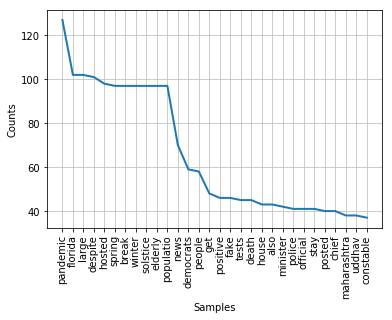

In [12]:
fdist.plot(30,cumulative=False)
plt.show()

### Wordcloud

In [13]:
import operator # To sort dictionary values
# join the words in string
words = ' '.join(corpus)
words = words.split()
#print(words)
# create a empty dictionary
data = dict()
#  Get frequency for each words where word is the key and the count is the value
for word in (words):
    word = word.lower()
    data[word] = data.get(word, 0) + 1
# Sort the dictionary in reverse order to print first the most used terms    
dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))

{'pandemic': 127,
 'florida': 102,
 'large': 102,
 'despite': 101,
 'hosted': 98,
 'spring': 97,
 'break': 97,
 'winter': 97,
 'solstice': 97,
 'elderly': 97,
 'populatio': 97,
 'news': 70,
 'democrats': 59,
 'people': 58,
 'get': 48,
 'positive': 46,
 'fake': 46,
 'tests': 45,
 'death': 45,
 'house': 43,
 'also': 43,
 'minister': 42,
 'police': 41,
 'official': 41,
 'stay': 41,
 'posted': 40,
 'chief': 40,
 'maharashtra': 38,
 'uddhav': 38,
 'constable': 37,
 'thackerays': 37,
 'residence': 37,
 'deaths': 37,
 'health': 37,
 'says': 36,
 'president': 33,
 'want': 33,
 'like': 32,
 'numbers': 32,
 'padded': 32,
 'us': 31,
 'let': 31,
 'combat': 31,
 'york': 30,
 'adding': 30,
 'almost': 30,
 'believe': 30,
 'spread': 29,
 'proof': 29,
 'boosted': 29,
 'count': 29,
 'peopl': 29,
 'straight': 29,
 'sh': 29,
 'please': 28,
 'hot': 28,
 'care': 28,
 'due': 28,
 'cases': 27,
 'government': 27,
 'trump': 27,
 'states': 26,
 'mic': 26,
 'war': 26,
 'lockdown': 26,
 'hydroxychloroquine': 24,
 

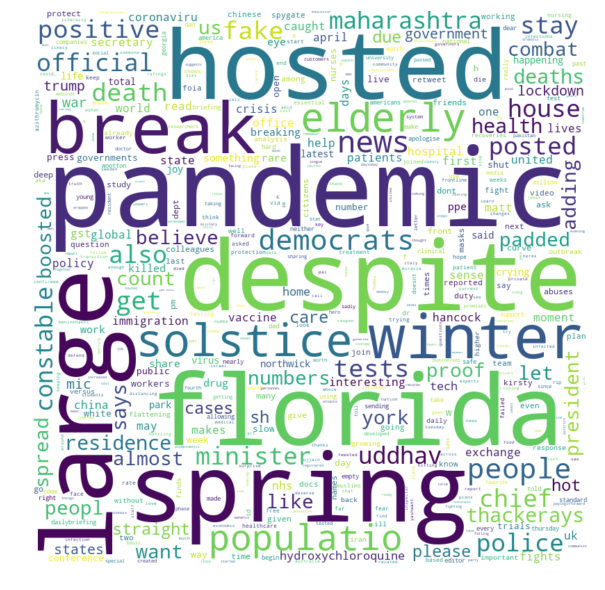

In [14]:
word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 500)
word_cloud.generate_from_frequencies(data)
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()